In [1]:
import pandas as pd


In [2]:
# Read the data from csv file
df = pd.read_csv('pima-indians-diabetes.data',header=None)

In [3]:
df


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [7]:
feature_names = ['pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age','label']

In [8]:
# Column names are not meaningful, so link the feature names to column names
df = pd.read_csv('pima-indians-diabetes.data',names= feature_names, header=None)

In [9]:
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
correlation_matrix = df.corr()

In [11]:
correlation_matrix['label']

pregnant    0.221898
glucose     0.466581
bp          0.065068
skin        0.074752
insulin     0.130548
bmi         0.292695
pedigree    0.173844
age         0.238356
label       1.000000
Name: label, dtype: float64

In [12]:
# X - independent variables
# Y - dependent variable - can be 0 or 1. That is, whether the person has diabetis or no.
# This is a classification problem. So, Logistic Regression is used here.
X =  df[['pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age']]
y = df['label']

In [13]:
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [15]:
# split data into train and test. by default, 75 percent train, and 25 percent test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [17]:
# this is supervised learning - Classification problem. So Logistic Regression is used.
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
# First train the model, then test using test data.
logReg.fit(X_train,y_train)

C:\Users\srivi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# predict the y based on X_test.
prediction = logReg.predict(X_test)

In [19]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
test = pd.DataFrame({'Predicted':prediction,'Actual':y_test})
print('total test \n', test.count())
print('Predicted not equal to Actual:\n', test[test['Predicted'] != test['Actual']].count())
print('Predicted equal to Actual:\n', test[test['Predicted'] == test['Actual']].count())

total test 
 Predicted    192
Actual       192
dtype: int64
Predicted not equal to Actual:
 Predicted    43
Actual       43
dtype: int64
Predicted equal to Actual:
 Predicted    149
Actual       149
dtype: int64


In [21]:
# Accuracy score for the model
from sklearn import metrics
print(metrics.accuracy_score(y_test,prediction))

0.7760416666666666


In [22]:
# Confusion matrix for the model
cm = metrics.confusion_matrix(y_test, logReg.predict(X_test))

In [23]:
cm

array([[109,  14],
       [ 29,  40]], dtype=int64)

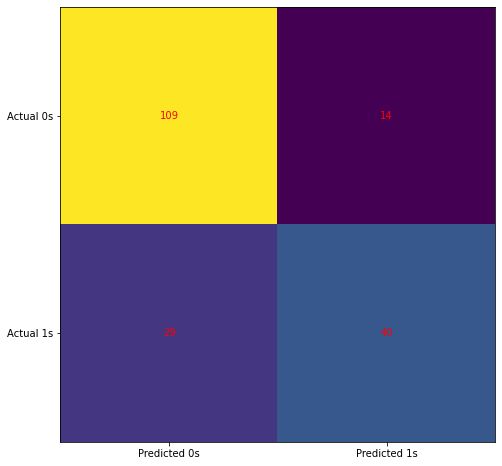

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
